# Cancer Type Prediction using Logistic Regression

In [1]:
# import packages
import scipy.io as sio
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [2]:
# load data
mat_file = "/Users/christophertarkaa/Bioinformatics/sf5n64hydt-1/cancer types.mat"
mat = sio.loadmat(mat_file)

In [3]:
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'cancerTypes', 'data', 'geneIds'])


In [4]:
# extract data
X = mat['data']
y = mat['cancerTypes']

In [5]:
# Flatten and extract the strings from the inner arrays
y = np.array([item[0] for item in y.flatten()])

In [6]:
# Encode the labels 
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)  # Convert to one-hot encoding

In [7]:
# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)

In [9]:
# get input shape and number of classes
input_dim = X_train.shape[1]  # Number of genes (features)
num_classes = y_train.shape[1]  # Number of unique cancer types

In [10]:
input_dim, num_classes

(972, 5)

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(num_classes, input_shape=(input_dim,), activation='softmax')
])

/Users/christophertarkaa/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │         4,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # For one-hot encoded labels
              metrics=['accuracy'])

In [14]:
# Network and training parameters
epochs = 100
batch_size = 32
verbose = 1
validation_split = 0.2

In [15]:
# Training
history = model.fit(X_train, y_train,
                 
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=verbose,
                    validation_split=validation_split)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6285 - loss: 0.9391 - val_accuracy: 0.9371 - val_loss: 0.2556
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9702 - loss: 0.1264 - val_accuracy: 0.9551 - val_loss: 0.1785
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9891 - loss: 0.0598 - val_accuracy: 0.9551 - val_loss: 0.1530
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9892 - loss: 0.0467 - val_accuracy: 0.9581 - val_loss: 0.1434
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9937 - loss: 0.0347 - val_accuracy: 0.9671 - val_loss: 0.1336
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9914 - loss: 0.0305 - val_accuracy: 0.9731 - val_loss: 0.1234
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9946 - loss: 0.0262 - val_accuracy: 0.9701 - val_loss: 0.1223
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9978 - loss: 0.0182 - val_accuracy: 0.9671 - v

In [16]:
# Make predictions
y_pred_proba = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_proba, axis=1)
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [17]:
# True labels
y_test_classes = np.argmax(y_test, axis=1)
y_test_labels = label_encoder.inverse_transform(y_test_classes)

In [18]:
# Print sample predictions
print("\nSample predictions:")
for i in range(5):
    print(f"True: {y_test_labels[i]}, Predicted: {y_pred_labels[i]}")


Sample predictions:
True: BRCA, Predicted: BRCA
True: BRCA, Predicted: BRCA
True: BRCA, Predicted: BRCA
True: BRCA, Predicted: BRCA
True: LUSC, Predicted: BRCA


In [19]:
# Evaluate
from sklearn.metrics import accuracy_score, classification_report
print(f"\nAccuracy: {accuracy_score(y_test_classes, y_pred_classes):.4f}")
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))


Accuracy: 0.9833
Classification Report:
              precision    recall  f1-score   support

        BRCA       0.99      0.99      0.99       184
        KIRC       0.98      1.00      0.99        97
        LUAD       0.95      0.95      0.95        42
        LUSC       0.96      0.94      0.95        50
        UCEC       1.00      1.00      1.00        45

    accuracy                           0.98       418
   macro avg       0.98      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418



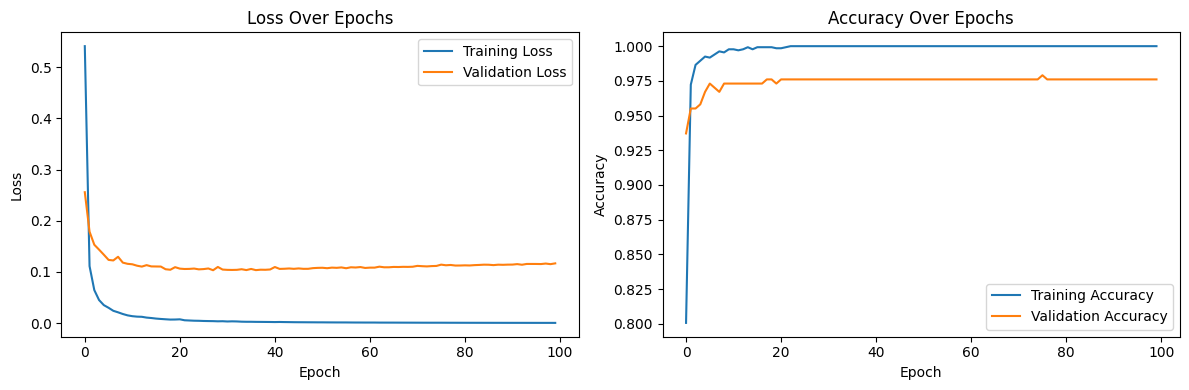

In [20]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()